In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [3]:
db_filename = 'dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

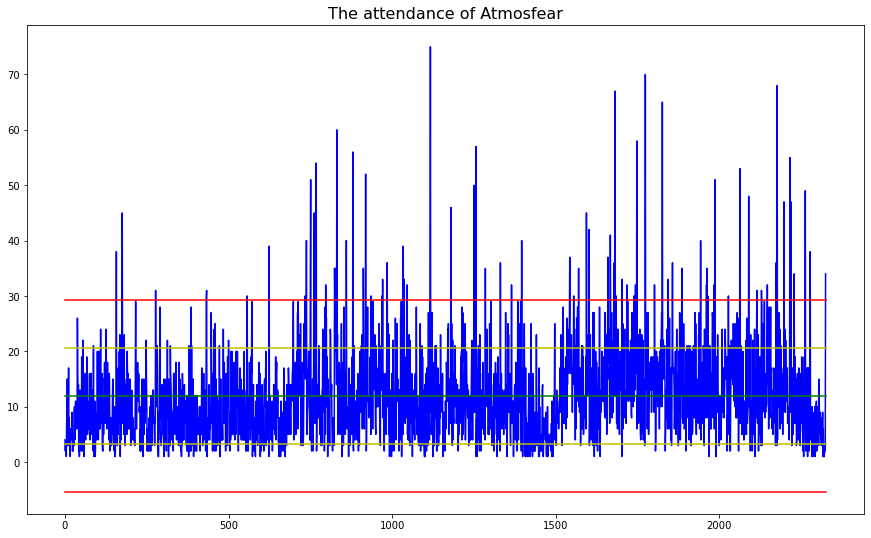

In [50]:
#Question 1 
# 1.按要求从数据表中读取并按分钟统计游乐项目Atmosfear的参入量
# 2.计算每分钟参数量的和
# 3.标出平均线、上下1倍平均线、上下2倍平均线
# 4.画出参入量图

c.execute("SELECT substr(checkin.timestamp,6,11) as minutes, count(checkin.attraction) as times FROM checkin,attraction where checkin.attraction = attraction.AttractionID and attraction.Name ='Atmosfear'  GROUP BY minutes ORDER BY minutes ASC")
rs = c.fetchall()
data = pd.DataFrame.from_records(rs, columns=['hours', 'times'])
temps = data['times']

mean = np.nanmean(temps)
std = np.nanstd(temps)
plt.figure(figsize=(15,9))
plt.plot(range(len(temps)),temps,'b-')
plt.plot([0,len(temps)],[mean,mean],'g-')
plt.plot([0,len(temps)],[mean+std,mean+std],'y-')
plt.plot([0,len(temps)],[mean-std,mean-std],'y-')
plt.plot([0,len(temps)],[mean+2*std,mean+2*std],'r-')
plt.plot([0,len(temps)],[mean-2*std,mean-2*std],'r-')
plt.show()

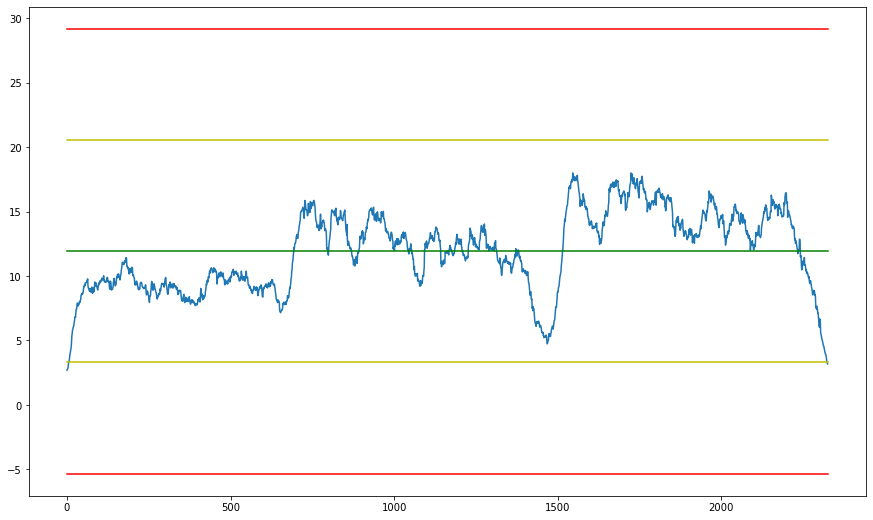

In [55]:
#Question 2
# 1.将窗口大小设置为50
# 2.利用Numpy的convolve函数计算移动窗口平均数据
# 3.标出标出平均线、上下1倍平均线、上下2倍平均线
# 4.画出参入量的移动平均图

windowSize = 50
plt.figure(figsize=(15,9))
plt.plot(np.convolve(temps,np.ones(windowSize,)/windowSize,'same'))
plt.plot([0,len(temps)],[mean,mean],'g-')
plt.plot([0,len(temps)],[mean+std,mean+std],'y-')
plt.plot([0,len(temps)],[mean-std,mean-std],'y-')
plt.plot([0,len(temps)],[mean+2*std,mean+2*std],'r-')
plt.plot([0,len(temps)],[mean-2*std,mean-2*std],'r-')
plt.show()

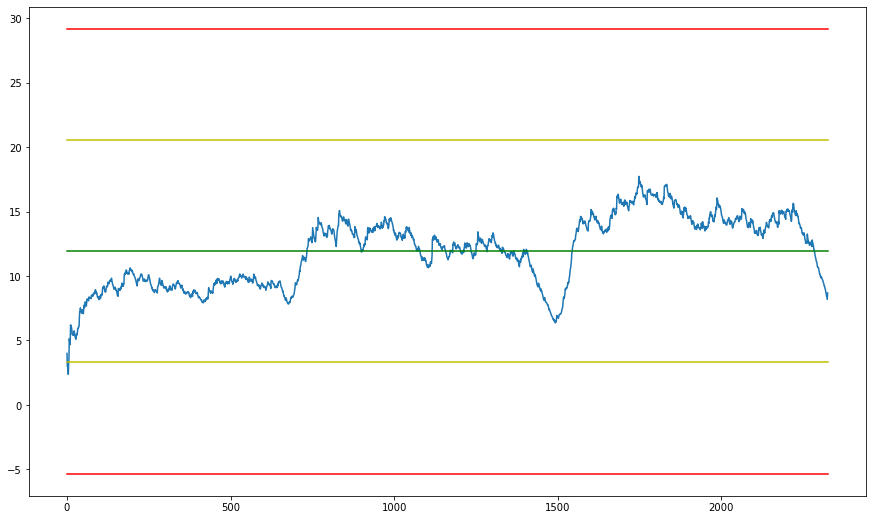

In [56]:
#Question 3
# 1.将窗口大小设置为50
# 2.利用Numpy的convolve函数计算移动窗口平均数据
# 3.标出标出平均线、上下1倍平均线、上下2倍平均线
# 4.画出指数加权移动平均值图

windowSize = 50
df = pd.DataFrame({'temps':temps})
df_exp=df.ewm(windowSize).mean()
plt.figure(figsize=(15,9))
plt.plot(df_exp)
plt.plot([0,len(temps)],[mean,mean],'g-')
plt.plot([0,len(temps)],[mean+std,mean+std],'y-')
plt.plot([0,len(temps)],[mean-std,mean-std],'y-')
plt.plot([0,len(temps)],[mean+2*std,mean+2*std],'r-')
plt.plot([0,len(temps)],[mean-2*std,mean-2*std],'r-')
plt.show()